## no sampling vs my sampling on machine learning models

In [1]:
import os
os.getcwd()

'/home/jbang36/eva_jaeho/eva_storage/evaluation/evaluate_rep'

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2

import os
import sys
sys.argv=['']
sys.path.append('../../../')


import numpy as np
#import utils.helpers as helpers
import utils as helpers
from loaders.uadetrac_loader import UADetracLoader
from eva_storage.preprocessingModule import PreprocessingModule
from eva_storage.UNet import UNet
from eva_storage.clusterModule import ClusterModule
from filters.minimum_filter import FilterMinimum
from eva_storage.evaluation.evaluate_compression import *


Populating the interactive namespace from numpy and matplotlib


In [4]:
import torch
torch.cuda.set_device(1)

In [5]:
"""uncomment this if loader functionality all works
loader = UADetracLoader()
images = loader.load_cached_images()
video_start_indices = loader.get_video_start_indices()
labels = loader.load_cached_labels()

"""

loader = UADetracLoader()
images = loader.load_cached_images()
video_start_indices = loader.get_video_start_indices()
labels = loader.load_cached_labels()


In [6]:
print(images.shape)
print(video_start_indices)

(25435, 300, 300, 3)
[1645 1600 1750 1490 1765 1150 2635 1700 2495 2195 2120 1145 2025 1720]


In [6]:
"""
Put loading operations in one cell
loader = UADetracLoader()
images = loader.load_images(dir = '/home/jbang36/eva_jaeho/data/ua_detrac/4_images')
video_start_indices = loader.get_video_start_indices()
labels = loader.load_labels(dir='/home/jbang36/eva_jaeho/data/ua_detrac/4_xml')
"""


Number of files added:  25435
walking /home/jbang36/eva_jaeho/data/ua_detrac/4_xml for xml parsing
before sorting operation ['MVI_40131.xml', 'MVI_40152.xml', 'MVI_40751.xml', 'MVI_40171.xml', 'MVI_40752.xml', 'MVI_40191.xml', 'MVI_40172.xml', 'MVI_40192.xml', 'MVI_40141.xml', 'MVI_40871.xml', 'MVI_40732.xml', 'MVI_40181.xml', 'MVI_40162.xml', 'MVI_40161.xml']
files len 14
/home/jbang36/eva_jaeho/data/ua_detrac/4_xml [] ['MVI_40131.xml', 'MVI_40141.xml', 'MVI_40152.xml', 'MVI_40161.xml', 'MVI_40162.xml', 'MVI_40171.xml', 'MVI_40172.xml', 'MVI_40181.xml', 'MVI_40191.xml', 'MVI_40192.xml', 'MVI_40732.xml', 'MVI_40751.xml', 'MVI_40752.xml', 'MVI_40871.xml']
----------------
MVI_40131.xml
1645
1645
----------------
MVI_40141.xml
1600
1600
----------------
MVI_40152.xml
1750
1750
----------------
MVI_40161.xml
1490
1490
----------------
MVI_40162.xml
1765
1765
----------------
MVI_40171.xml
1150
1150
----------------
MVI_40172.xml
2635
2635
----------------
MVI_40181.xml
1700
1700
---------

In [7]:
"""
save corresponding image related files for fast upload next time"""
loader.save_images()
loader.save_labels()

saved images to /home/jbang36/eva_jaeho/data/npy_files/ua_detrac_images.npy
saved video indices to /home/jbang36/eva_jaeho/data/npy_files/ua_detrac_vi.npy
saved labels to /home/jbang36/eva_jaeho/data/npy_files/ua_detrac_labels.npy


### done with dataset loading operations!!

In [17]:
print(images.shape)

(83791, 300, 300, 3)


In [7]:
# run background subtraction
pm = PreprocessingModule()
seg_images = pm.run(images,video_start_indices)
print(seg_images.shape)


(25435, 300, 300)


In [9]:
## save the segmented images so that we don't have to rerun the proprocessor
pm.saveSegmentedImages(overwrite=True)


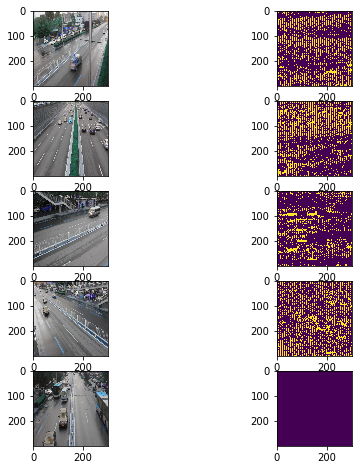

In [8]:
### let's see some seg images side by side with original images (5 sets)
import random

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 5
for i in range(1, columns*rows +1, 2):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    random_index = random.randint(0, 20000)
    plt.imshow(images[random_index])
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(seg_images[random_index])
plt.show()



In [12]:
os.getcwd()

'/home/jbang36/eva_jaeho/eva_storage/evaluation/evaluate_rep'

In [14]:
# train the main network
unet = UNet()
unet.train(images, seg_images, load=False)


New instance will be initialized
<class 'torch.device'>
Training the network....
epoch [0/100], loss:0.1370, time elapsed:396.1035 (sec)
Saving the trained model as.... /home/jbang36/eva_jaeho/models/unet_uadetrac-epoch0.pth
epoch [1/100], loss:0.1351, time elapsed:421.0872 (sec)
epoch [2/100], loss:0.1360, time elapsed:396.0005 (sec)
epoch [3/100], loss:0.1322, time elapsed:403.7159 (sec)
epoch [4/100], loss:0.1321, time elapsed:398.2281 (sec)
epoch [5/100], loss:0.1303, time elapsed:394.4018 (sec)
epoch [6/100], loss:0.1308, time elapsed:405.6708 (sec)
epoch [7/100], loss:0.1303, time elapsed:401.8913 (sec)
epoch [8/100], loss:0.1304, time elapsed:399.2438 (sec)
epoch [9/100], loss:0.1282, time elapsed:412.6130 (sec)
epoch [10/100], loss:0.1284, time elapsed:399.7251 (sec)
Saving the trained model as.... /home/jbang36/eva_jaeho/models/unet_uadetrac-epoch10.pth
epoch [11/100], loss:0.1286, time elapsed:410.2715 (sec)
epoch [12/100], loss:0.1288, time elapsed:405.4758 (sec)
epoch [13/1

In [ ]:
## network is naturally saved, next time when running, it will automatically load
""""""
unet = UNet()
unet.train(images, seg_images, epoch=99)



loading previous model!
trying to load file  /home/jbang36/eva_jaeho/models/unet_uadetrac-epoch99.pth
Model successfully loaded!
Training the network....
epoch [0/100], loss:0.1289, time elapsed:438.0157 (sec)
Saving the trained model as.... /home/jbang36/eva_jaeho/models/unet_uadetrac-epoch0.pth
epoch [1/100], loss:0.1309, time elapsed:400.0753 (sec)
epoch [2/100], loss:0.1296, time elapsed:398.0545 (sec)
epoch [3/100], loss:0.1279, time elapsed:412.7986 (sec)
epoch [4/100], loss:0.1301, time elapsed:410.1962 (sec)
epoch [5/100], loss:0.1326, time elapsed:411.8224 (sec)
epoch [6/100], loss:0.1356, time elapsed:404.9019 (sec)
epoch [7/100], loss:0.1298, time elapsed:404.1622 (sec)
epoch [8/100], loss:0.1281, time elapsed:398.6711 (sec)
epoch [9/100], loss:0.1276, time elapsed:411.3605 (sec)
epoch [10/100], loss:0.1305, time elapsed:396.6653 (sec)
Saving the trained model as.... /home/jbang36/eva_jaeho/models/unet_uadetrac-epoch10.pth
epoch [11/100], loss:0.1286, time elapsed:426.0343 (

In [15]:
# Generate the compressed / segmented images
unet_compressed_images, unet_segmented_images = unet.execute()


In [16]:
# Create clusters
cm = ClusterModule()
image_cluster_labels = cm.run(unet_compressed_images)


Time to fit  25435 :  30.386281728744507


In [18]:
# Generate binary labels
## within labels['vehicle'] there are ['car', 'others', 'van', 'bus']

car_labels = helpers.generateBinaryLabels(labels['vehicle'])
other_labels = helpers.generateBinaryLabels(labels['vehicle'], label_of_interest = 'others')
van_labels = helpers.generateBinaryLabels(labels['vehicle'], 'van')
bus_labels = helpers.generateBinaryLabels(labels['vehicle'], 'bus')


In [19]:
## must check balance within the label set

print(len(car_labels[car_labels == 0]))
print(len(car_labels[car_labels == 1]))

print(len(other_labels[other_labels == 0]))
print(len(other_labels[other_labels == 1]))

## can use
print(len(van_labels[van_labels == 0]))
print(len(van_labels[van_labels == 1]))
## can use
print(len(bus_labels[bus_labels == 0]))
print(len(bus_labels[bus_labels == 1]))

391
25044
24084
1351
14148
11287
15245
10190


In [20]:
## divide the training and validation dataset for all frames
division_point = int(images.shape[0] * 0.8)
train_set = {}
test_set = {}
    
# this set contains [image, labels, cluster_labels]
train_set['van'] = [images[:division_point], van_labels[:division_point], image_cluster_labels[:division_point]]
train_set['bus'] = [images[:division_point], bus_labels[:division_point], image_cluster_labels[:division_point]]
test_set['van'] = [images[division_point:], van_labels[division_point:], image_cluster_labels[division_point:]]
test_set['bus'] = [images[division_point:], bus_labels[division_point:], image_cluster_labels[division_point:]]


In [21]:
## divide the training and validation dataset for rep frames
#division_point = int(rep_images.shape[0] *0.8)

rep_train_set = {}
rep_test_set = {}
for key in ['van', 'bus']:
    rep_train_set[key] = get_rep_frames(train_set[key][0], train_set[key][1], train_set[key][2])
    rep_test_set[key] = get_rep_frames(test_set[key][0], test_set[key][1], test_set[key][2])
    

In [22]:
# Test on filters
fm_everyframe_set = {}
fm_repframe_set = {}
for key in ['van', 'bus']:
    print("training", key, ".....")
    fm_everyframe_set[key] = FilterMinimum()
    fm_everyframe_set[key].train(train_set[key][0], train_set[key][1])
    
    fm_repframe_set[key] = FilterMinimum()
    fm_repframe_set[key].train(rep_train_set[key][0], rep_train_set[key][1])
    

training van .....
(16278, 270000)
(16278,)
(1016, 270000)
(1016,)
training bus .....
(16278, 270000)
(16278,)
(1016, 270000)
(1016,)


In [23]:
# Evaluate the filters
# add y_hat as the third element in the test_set
# test set [images, labels, cluster labels, predicted labels]

for key in ['van', 'bus']:
    test_set[key].append(fm_everyframe_set[key].predict(test_set[key][0], post_model_name= 'rf'))
    rep_test_set[key] = list(rep_test_set[key])
    rep_test_set[key].append(fm_repframe_set[key].predict(rep_test_set[key][0], post_model_name = 'rf'))
    



In [24]:
## compute all frame score

for key in ['van', 'bus']:
    tmp = np.array(test_set[key][1] - test_set[key][3])
    all_frame_score = len(tmp[tmp == 0]) / float(len(tmp))
    print(key, "score is", all_frame_score * 100, "%")

### accuracy seems really low...... is there something wrong with the network?
### we need to see if autoencoder can do it better

van score is 43.1885197562414 %
bus score is 56.536268920778454 %


In [25]:
## compute rep frame score
# this requires me to assess -> spread the labels -> compare against original results

def extend_labels(y_hat_rep, X_test_clusters):
    arr = np.zeros(shape = (len(X_test_clusters)))
    
    for i in range(len(X_test_clusters)):
        arr[i] = y_hat_rep[X_test_clusters[i]]
    return arr


In [26]:
for key in ['van', 'bus']:
    y_hat = extend_labels(rep_test_set[key][2], test_set[key][2])
    tmp = np.array(y_hat - test_set[key][1])
    rep_frame_score = len(tmp[tmp == 0]) / float(len(tmp))
    print(key, "score is", rep_frame_score * 100, "%")
    

van score is 45.88165913111853 %
bus score is 37.52702968350698 %


## Uniform sampling Evaluation

In [35]:
### need logic to perform comparison vs uniform sampling
end_frame = len(images)
fps = 20
uniform_indexes_train = [i for i in range(0, division_point, fps)]
uniform_indexes_test = [(i - division_point) for i in range(division_point, end_frame, fps)] 


In [36]:
## steps
## 1. get the corresponding labels, train the models, evaluate the model, and extend the labels

## this set contains [image, labels, cluster_labels]
## divide the training and validation dataset for rep frames
## division_point = int(rep_images.shape[0] * 0.8)

sample_train_set = {}
sample_test_set = {}
for key in ['van', 'bus']:
    sample_train_set[key] = (train_set[key][0][uniform_indexes_train], train_set[key][1][uniform_indexes_train]) ##rep_images, rep_labels get_rep_frames(train_set[key][0], train_set[key][1], train_set[key][2])
    sample_test_set[key] = (test_set[key][0][uniform_indexes_test], test_set[key][1][uniform_indexes_test])
    


In [37]:
# Test on filters
fm_uniframe_set = {}
for key in ['van', 'bus']:
    print("training", key, ".....")
    fm_uniframe_set[key] = FilterMinimum()
    fm_uniframe_set[key].train(sample_train_set[key][0], sample_train_set[key][1])
    
    

training van .....
(814, 270000)
(814,)
training bus .....
(814, 270000)
(814,)


In [39]:
# Evaluate the filters
# add y_hat as the third element in the test_set
# test set [images, labels, cluster labels, predicted labels]

for key in ['van', 'bus']:
    #test_set[key].append(fm_everyframe_set[key].predict(test_set[key][0], post_model_name= 'rf'))
    sample_test_set[key] = list(sample_test_set[key])
    sample_test_set[key].append(fm_uniframe_set[key].predict(sample_test_set[key][0], post_model_name = 'rf'))
    


In [40]:
## compute all frame score

for key in ['van', 'bus']:
    tmp = np.array(test_set[key][1] - test_set[key][3])
    all_frame_score = len(tmp[tmp == 0]) / float(len(tmp))
    print(key, "score is", all_frame_score * 100, "%")


van score is 43.1885197562414 %
bus score is 56.536268920778454 %


In [45]:
### need to extend the labels
## TODO: modify this function for sampling
## for sampling, we will assume each 'cluster' is 
## from the starting frame to the frame right before the end


def extend_labels_sampling(y_hat_samp, images):
    end_frame = len(images)
    fps = 20
    arr = np.zeros(shape = (len(images)))
    print(arr.shape)
    print(len(y_hat_samp))
    
    j = -1
    for i in range(len(images)):
        if i % fps == 0:
            j += 1
        arr[i] = y_hat_samp[j]
    
    return arr


In [46]:
for key in ['van', 'bus']:
    y_hat = extend_labels_sampling(sample_test_set[key][2], images[division_point:])
    tmp = np.array(y_hat - test_set[key][1])
    rep_frame_score = len(tmp[tmp == 0]) / float(len(tmp))
    print(key, "score is", rep_frame_score * 100, "%")

(5087,)
255
van score is 58.364458423432275 %
(5087,)
255
bus score is 54.55081580499312 %


# Result shows that even for this network (segmentation), the compression technique works fairly well. 
# In terms of deep learning technique application, I think it would be nice to show how using these datapoint with augmentation could be more beneficial?

In [ ]:
################ End of new evaluation!!! ############
## Future work: Does it work for other types of models as well?




In [6]:
# Evaluate the filters
pca_model = pp.trained_pre['pca']
trained_models = pp.trained_post 
tic = time.time()
"""
{'t=car': {'pca_svm': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=10000, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
"""
X_test_reshaped = pp._reshape_image(X_test)
X_test_pcaed = pca_model.transform(X_test_reshaped)
Y_names, Y_test = pp._generate_binary_labels(Y_test_dict, len(X_test_pcaed))

print(Y_test.shape)

stats = {}
for Y_col, models in trained_models.items():
    for model_name, model in models.items():
        if 'pca' in model_name:
            index = Y_names.index(Y_col)
            #print("index is",index)
            #print(Y_test[:10][0])
            #print(type(index))
            score = model.score(X_test_pcaed, Y_test[:, index])
            stats[Y_col + " " + model_name] = [score]
        else:
            index = Y_names.index(Y_col)
            score = model.score(X_test_reshaped, Y_test[:, index])
            stats[Y_col + " " + model_name] = [score]

print("Finished evaluation in ", time.time() - tic, "seconds")

before: (2085, 540, 960, 1)
After change, shape of image is (2085, 8160)
(2085, 21)
['t=car', 't=van', 't=bus', 't=others', 'c=red', 'c=white', 'c=black', 'c=silver', 's>40', 's>50', 's>60', 's<65', 's<70', 'i=pt335', 'i=pt211', 'i=pt342', 'i=pt208', 'o=pt335', 'o=pt211', 'o=pt342', 'o=pt208']
[[1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
(2085, 21)
Finished evaluation in  3.4608132

In [7]:
# convert stats dict to table
# rows should be column name and model
# cols should be accuracy, training_time

print(stats)
stats_arr = np.zeros(shape=(len(stats), 2))
row_names = []
index = 0
for row, col in stats.items():
    row_names.append(row)
    stats_arr[index, 0] = col[0]
    index += 1
    
for Y_col, models in pp.column_stats.items():
    for model_name, cost in models.items():
        row_index = row_names.index(Y_col + " " + model_name)
        stats_arr[row_index, 1] = cost[0]

{'t=car pca_svm': [0.9755395683453237], 't=car dnn': [1.0], 't=car pca_rf': [1.0], 't=van pca_svm': [0.49544364508393285], 't=van dnn': [0.6661870503597123], 't=van pca_rf': [0.6719424460431654], 't=bus pca_svm': [0.38657074340527575], 't=bus dnn': [0.697841726618705], 't=bus pca_rf': [0.5712230215827339], 't=others pca_svm': [0.9314148681055155], 't=others dnn': [0.9592326139088729], 't=others pca_rf': [0.9592326139088729], 'c=red pca_svm': [0.03405275779376499], 'c=red dnn': [0.962589928057554], 'c=red pca_rf': [0.973621103117506], 'c=white pca_svm': [0.43884892086330934], 'c=white dnn': [0.965947242206235], 'c=white pca_rf': [0.9769784172661871], 'c=black pca_svm': [0.252757793764988], 'c=black dnn': [0.9621103117505995], 'c=black pca_rf': [0.9731414868105516], 'c=silver pca_svm': [0.6081534772182254], 'c=silver dnn': [0.9630695443645084], 'c=silver pca_rf': [0.9741007194244604], 's>40 pca_svm': [0.42302158273381296], 's>40 dnn': [0.7587529976019185], 's>40 pca_rf': [0.7889688249400

In [8]:
print(row_names)
print(stats_arr)

['t=car pca_svm', 't=car dnn', 't=car pca_rf', 't=van pca_svm', 't=van dnn', 't=van pca_rf', 't=bus pca_svm', 't=bus dnn', 't=bus pca_rf', 't=others pca_svm', 't=others dnn', 't=others pca_rf', 'c=red pca_svm', 'c=red dnn', 'c=red pca_rf', 'c=white pca_svm', 'c=white dnn', 'c=white pca_rf', 'c=black pca_svm', 'c=black dnn', 'c=black pca_rf', 'c=silver pca_svm', 'c=silver dnn', 'c=silver pca_rf', 's>40 pca_svm', 's>40 dnn', 's>40 pca_rf', 's>50 pca_svm', 's>50 dnn', 's>50 pca_rf', 's>60 pca_svm', 's>60 dnn', 's>60 pca_rf', 'i=pt335 pca_svm', 'i=pt335 dnn', 'i=pt335 pca_rf', 'i=pt211 pca_svm', 'i=pt211 dnn', 'i=pt211 pca_rf', 'i=pt342 pca_svm', 'i=pt342 dnn', 'i=pt342 pca_rf', 'i=pt208 pca_svm', 'i=pt208 dnn', 'i=pt208 pca_rf', 'o=pt335 pca_svm', 'o=pt335 dnn', 'o=pt335 pca_rf', 'o=pt211 pca_svm', 'o=pt211 dnn', 'o=pt211 pca_rf', 'o=pt342 pca_svm', 'o=pt342 dnn', 'o=pt342 pca_rf', 'o=pt208 pca_svm', 'o=pt208 dnn', 'o=pt208 pca_rf', 's<65 dnn', 's<65 pca_rf', 's<70 dnn', 's<70 pca_rf']
[[

In [8]:
# Now cluster the data

%pylab inline
import os
import keras
import cv2
import time
import numpy as np
import pandas as pd
import keras.backend as K
import tensorflow as tf

import sklearn.metrics as metrics

from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Conv2DTranspose, Flatten,Reshape, UpSampling2D, Cropping2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

Populating the interactive namespace from numpy and matplotlib


/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['load']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
Using TensorFlow backend.


(540, 960, 1)
(540, 960)
(540, 960)


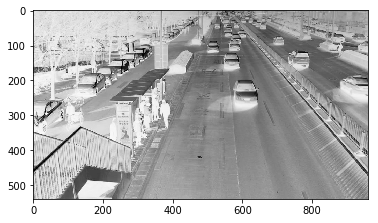

In [9]:
import matplotlib.pyplot as plt
import random
image_index = random.randint(0,100) # You may select anything up to 60,000
print(X_train[image_index].shape)

example = X_train[image_index]
width, height, channels = example.shape
example = np.squeeze(example)
print(np.squeeze(example).shape)
print(example.shape)

plt.imshow(example, cmap='Greys')

In [10]:
# Must perform normalization for the autoencoder to perform well
X_train_norm = np.copy(X_train)
X_test_norm = np.copy(X_test)

def _format_image(X, sampling_rate=12):
    print("before:", X.shape)
    reduction_rate = sampling_rate
    # need to down shape them so that the kernels can train faster
    # image should be num_samples, height, width, channel
    downsampled_images = X[:, ::reduction_rate, ::reduction_rate, :]
    downsampled_images = downsampled_images.astype(np.float32)
    print("After change, shape of image is", downsampled_images.shape)
    downsampled_images /= 255.0
    return downsampled_images

X_train_norm = _format_image(X_train_norm)
X_test_norm = _format_image(X_test_norm)



before: (8336, 540, 960, 1)
After change, shape of image is (8336, 45, 80, 1)
before: (2085, 540, 960, 1)
After change, shape of image is (2085, 45, 80, 1)


In [11]:

keras.backend.clear_session()
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [12]:
n_samples1, width1, height1, channels1 = X_train_norm.shape
n_samples2, width2, height2, channels2 = X_test_norm.shape

assert(width1 == width2)
assert(height1 == height2)
assert(channels1 == channels2)

In [13]:
# Combined network with both FC and CNN layers

n_samples, width, height, channels = X_train_norm.shape
# Input
input_img = Input(shape=(width, height, 1))
# Encoder
x = Conv2D(8,(3,3),
           activation='relu',
           padding='same')(input_img)
x = Conv2D(8,(3,3),
           activation='relu',
           padding='same')(x)
x = MaxPooling2D((2,2),
                 padding='same')(x) 
x = Conv2D(16,(3,3),
           activation='relu',
           padding='same')(x)
x = Conv2D(16,(3,3),
           activation='relu',
           padding='same')(x)
x = MaxPooling2D((2,2),
                 padding='same')(x) # Size 
x = Flatten()(x)
encoded = Dense(256)(x)
# Decoder
x = Dense(3840)(encoded)
x = Reshape((12, 20, 16))(x)
x = UpSampling2D((2, 2))(x) # 24, 40, 16
x = Conv2D(16, (3, 3),
           activation='relu',
           padding='same')(x)
x = Conv2D(16, (3, 3),
           activation='relu',
           padding='same')(x)
x = UpSampling2D((2, 2))(x)  # Size 48, 80, 16
x = Conv2D(8, (3, 3),
           activation='relu',
           padding='same')(x)
x = Conv2D(1, (3, 3),
           activation='relu',
           padding='same')(x)

decoded = Cropping2D(cropping=((2,1),(0,0)),
               data_format='channels_last')(x) # size 45, 80, 16


autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 45, 80, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 80, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 80, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 40, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 40, 16)        1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 40, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 20, 16)        0         
__________

In [14]:
start_time = time.time()
train_history = autoencoder.fit(X_train_norm, X_train_norm, epochs=200, batch_size=2048, validation_data=(X_test_norm, X_test_norm))
print("Total time it took to train autoencoder is ", time.time() - start_time, " seconds")

Train on 8336 samples, validate on 2085 samples
Epoch 1/200
8336/8336 [==============================] - 5s 641us/step - loss: 0.2036 - val_loss: 0.0851
Epoch 2/200
8336/8336 [==============================] - 1s 113us/step - loss: 0.0689 - val_loss: 0.0465
Epoch 3/200
8336/8336 [==============================] - 1s 112us/step - loss: 0.0370 - val_loss: 0.0286
Epoch 4/200
8336/8336 [==============================] - 1s 112us/step - loss: 0.0282 - val_loss: 0.0251
Epoch 5/200
8336/8336 [==============================] - 1s 112us/step - loss: 0.0248 - val_loss: 0.0241
Epoch 6/200
8336/8336 [==============================] - 1s 113us/step - loss: 0.0236 - val_loss: 0.0228
Epoch 7/200
8336/8336 [==============================] - 1s 113us/step - loss: 0.0227 - val_loss: 0.0223
Epoch 8/200
8336/8336 [==============================] - 1s 115us/step - loss: 0.0222 - val_loss: 0.0221
Epoch 9/200
8336/8336 [==============================] - 1s 113us/step - loss: 0.0218 - val_loss: 0.0217
Epoch 1

In [15]:
# After downsizing the images, we need to cluster them by similarity
# Heuristic we will use is to assume fps rate is 20. We will make num_samples / 20 clusters

# Apply hierarchical clustering
# Remember the indexes
# Put the images into correct locations
# TODO: Currently the images are not being divided correctly... We need to find out why

from sklearn.cluster import AgglomerativeClustering

#image_table_flattened = image_table.reshape(-1, width*height).astype('float32')
#image_table /= 255.0

X_train_compressed = encoder.predict(X_train_norm)
X_test_compressed = encoder.predict(X_test_norm)


fps = 20
ac = AgglomerativeClustering(n_clusters=len(X_train_compressed) // fps)

start_time = time.time()
ac.fit(X_train_compressed)
print("Time to fit X_train", time.time() - start_time)
X_train_clusters = ac.labels_

start_time = time.time()
ac1 = AgglomerativeClustering(n_clusters=len(X_test_compressed) // fps)
ac1.fit(X_test_compressed)
print("Time to fit X_test", time.time() - start_time)
X_test_clusters = ac1.labels_


print(min(X_train_clusters))
print(max(X_train_clusters))
print(min(X_test_clusters))
print(max(X_test_clusters))

Time to fit X_train 6.6948816776275635
Time to fit X_test 0.3306722640991211
0
415
0
103


In [16]:
# Choose representative frames from each cluster
# Create a fake X_train, Y_train, X_val, Y_val for retraining the filters

# We have X_train, X_train_clusters (this gives cluster numbers), Y_train, Y_names

visited_cluster_nums = set()

n_samples, width1, height1, channels1 = X_train.shape
n_samples, width2, height2, channels2 = X_test.shape
X_train_rep = np.zeros(shape = (max(X_train_clusters)+1, width1, height1, channels1))
X_test_rep = np.zeros(shape = (max(X_test_clusters)+1, width2, height2, channels2))
Y_train_dict_rep = {}
Y_test_rep = np.zeros(shape = (max(X_test_clusters)+1, len(Y_names)))

import copy
categories = ['vehicle_type', 'color', 'speed', 'intersection']
for category in categories:
    Y_train_dict_rep[category] = [None] * (max(X_train_clusters)+1)

assert(len(X_train_clusters) == len(X_train))
for i in range(len(X_train_clusters)):
    if X_train_clusters[i] not in visited_cluster_nums:
        visited_cluster_nums.add(X_train_clusters[i])
        # we want to pick these frames out but we need to remember their index so that we can extract their labels
        # cluster number will be their index
        assert(len(X_train.shape) == 4)
        X_train_rep[X_train_clusters[i],:,:,:] = X_train[i,:,:,:]
        for category in categories:
            Y_train_dict_rep[category][X_train_clusters[i]] = copy.deepcopy(Y_train_dict[category][i])

visited_cluster_nums.clear()

for i in range(len(X_test_clusters)):
    if X_test_clusters[i] not in visited_cluster_nums:
        visited_cluster_nums.add(X_test_clusters[i])
        assert(len(X_test.shape) == 4)
        assert(len(Y_test.shape) == 2)
        X_test_rep[X_test_clusters[i],:,:,:] = X_test[i,:,:,:]
        Y_test_rep[X_test_clusters[i],:] = Y_test[i,:]


print(X_train_rep.shape)
print(X_test_rep.shape)

(416, 540, 960, 1)
(104, 540, 960, 1)


In [17]:
# Train the filters

pp_rep = PP()
start_time = time.time()
pp_rep.train(X_train_rep, Y_train_dict_rep)
print("Total time to train all columns all models ", time.time() - start_time, "seconds")

Generating binary labels...
(416, 21)
['t=car', 't=van', 't=bus', 't=others', 'c=red', 'c=white', 'c=black', 'c=silver', 's>40', 's>50', 's>60', 's<65', 's<70', 'i=pt335', 'i=pt211', 'i=pt342', 'i=pt208', 'o=pt335', 'o=pt211', 'o=pt342', 'o=pt208']
[[1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.]
 [1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.]
 [1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]]
Done in 0.023059368133544922 seconds
reshaping images...
before: (416, 540, 960, 1)
After 

/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


svm finished training for column t=van in 0.1851804256439209 seconds
Training for t=bus
svm finished training for column t=bus in 0.10453438758850098 seconds
Training for t=others
svm finished training for column t=others in 0.08056116104125977 seconds
Training for c=red


/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


svm finished training for column c=red in 0.09995484352111816 seconds
Training for c=white
svm finished training for column c=white in 0.09974145889282227 seconds
Training for c=black


/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


svm finished training for column c=black in 0.10201382637023926 seconds
Training for c=silver
svm finished training for column c=silver in 0.09936404228210449 seconds
Training for s>40


/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


svm finished training for column s>40 in 0.11259055137634277 seconds
Training for s>50
svm finished training for column s>50 in 0.11813688278198242 seconds
Training for s>60


/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


svm finished training for column s>60 in 0.10913467407226562 seconds
All the labels are same for column s<65
All the labels are same for column s<70
Training for i=pt335
svm finished training for column i=pt335 in 0.09655046463012695 seconds
Training for i=pt211
svm finished training for column i=pt211 in 0.09521627426147461 seconds
Training for i=pt342


/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


svm finished training for column i=pt342 in 0.0920872688293457 seconds
Training for i=pt208
svm finished training for column i=pt208 in 0.09675264358520508 seconds
Training for o=pt335
svm finished training for column o=pt335 in 0.09671187400817871 seconds
Training for o=pt211


/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


svm finished training for column o=pt211 in 0.10431551933288574 seconds
Training for o=pt342
svm finished training for column o=pt342 in 0.0975959300994873 seconds
Training for o=pt208


/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


svm finished training for column o=pt208 in 0.10831665992736816 seconds
Full Model Name: dnn using regular X_train
dnn finished training for column t=car in 0.0532069206237793 seconds
dnn finished training for column t=van in 0.12299609184265137 seconds
dnn finished training for column t=bus in 0.11021637916564941 seconds
dnn finished training for column t=others in 0.11219334602355957 seconds
dnn finished training for column c=red in 0.08009839057922363 seconds
dnn finished training for column c=white in 0.0601806640625 seconds
dnn finished training for column c=black in 0.07805943489074707 seconds
dnn finished training for column c=silver in 0.07957768440246582 seconds
dnn finished training for column s>40 in 0.13885784149169922 seconds
dnn finished training for column s>50 in 0.10492801666259766 seconds
dnn finished training for column s>60 in 0.10234689712524414 seconds
dnn finished training for column s<65 in 0.03783583641052246 seconds
dnn finished training for column s<70 in 0.0

/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.2

rf finished training for column c=black in 0.009264230728149414 seconds
rf finished training for column c=silver in 0.008298397064208984 seconds
rf finished training for column s>40 in 0.012278079986572266 seconds
rf finished training for column s>50 in 0.01220393180847168 seconds
rf finished training for column s>60 in 0.012184619903564453 seconds
rf finished training for column s<65 in 0.010623931884765625 seconds
rf finished training for column s<70 in 0.010385990142822266 seconds
rf finished training for column i=pt335 in 0.011962175369262695 seconds
rf finished training for column i=pt211 in 0.011941671371459961 seconds
rf finished training for column i=pt342 in 0.011947870254516602 seconds
rf finished training for column i=pt208 in 0.012093305587768555 seconds
rf finished training for column o=pt335 in 0.01200556755065918 seconds
rf finished training for column o=pt211 in 0.01199030876159668 seconds
rf finished training for column o=pt342 in 0.008198022842407227 seconds
rf finish

/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/nethome/jbang36/anaconda3/envs/eva_35/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
#extrapolate the predicted labels to all the images
def extend_labels(y_hat_rep, X_test_clusters):
    arr = np.zeros(shape = (len(X_test_clusters), 1))
    for i in range(len(X_test_clusters)):
        arr[i,0] = y_hat_rep[X_test_clusters[i]]
    return arr

def compute_score(y_hat, y):
    n = len(y_hat)
    assert(len(y_hat) == len(y))
    correct_count = 0
    for i in range(len(y_hat)):
        if y_hat[i] == y[i]:
            correct_count += 1
    return correct_count / len(y_hat)

In [19]:
# Evaluate the filters
pca_model_rep = pp_rep.trained_pre['pca']
trained_models_rep = pp_rep.trained_post 
tic = time.time()
"""
{'t=car': {'pca_svm': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=10000, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
"""
X_test_reshaped = pp_rep._reshape_image(X_test)
X_test_pcaed = pca_model_rep.transform(X_test_reshaped)


stats_rep = {}
for Y_col, models in trained_models_rep.items():
    for model_name, model in models.items():
        if 'pca' in model_name:
            index = Y_names.index(Y_col)
            #print("index is",index)
            #print(Y_test[:10][0])
            #print(type(index))
            y_hat_rep = model.predict(X_test_pcaed)
            y_hat = extend_labels(y_hat_rep, X_test_clusters)
            score = compute_score(y_hat, Y_test[:,index])
            stats_rep[Y_col + " " + model_name] = [score]
        else:
            index = Y_names.index(Y_col)
            y_hat_rep = model.predict(X_test_reshaped)
            y_hat = extend_labels(y_hat_rep, X_test_clusters)
            score = compute_score(y_hat, Y_test[:,index])
            stats_rep[Y_col + " " + model_name] = [score]

print("Finished evaluation in ", time.time() - tic, "seconds")

before: (2085, 540, 960, 1)
After change, shape of image is (2085, 8160)
Finished evaluation in  2.650135040283203 seconds


In [20]:
# Compute the accuracy and speed

# convert stats dict to table
# rows should be column name and model
# cols should be accuracy, training_time

stats_arr_rep = np.zeros(shape=(len(stats_rep), 2))
row_names_rep = []
index = 0
for row, col in stats_rep.items():
    row_names_rep.append(row)
    stats_arr_rep[index, 0] = col[0]
    index += 1
    
for Y_col, models in pp_rep.column_stats.items():
    for model_name, cost in models.items():
        row_index = row_names_rep.index(Y_col + " " + model_name)
        stats_arr_rep[row_index, 1] = cost[0]

In [21]:
# Create a comparison graph
#print(row_names)
#print(stats_arr)
#print("---------------")
#print(stats_arr_rep)

#align the rows so that they match
#create a matrix with a_ori, c_ori, a_adj, c_adj
#we will use row_names as standard

union_ = np.zeros(shape = (len(row_names),4 ))

print(len(row_names))
print(len(row_names_rep))


for idx, row_name in enumerate(row_names):
    union_[idx,0] = stats_arr[idx][0]
    union_[idx,1] = stats_arr[idx][1]
    if row_name not in row_names_rep:
        union_[idx, 2] = -1
        union_[idx, 3] = -1
    else:
        corresponding_idx = row_names_rep.index(row_name)
        union_[idx,2] = stats_arr_rep[corresponding_idx][0]
        union_[idx,3] = stats_arr_rep[corresponding_idx][1]
    
print(union_)
print(union_.shape)




61
60
[[ 9.75539568e-01  1.69000000e+00 -1.00000000e+00 -1.00000000e+00]
 [ 1.00000000e+00  6.01900000e+01  1.00000000e+00  5.00000000e-02]
 [ 1.00000000e+00  1.28000000e+00  1.00000000e+00  9.00000000e-02]
 [ 4.95443645e-01  3.99000000e+00  4.23501199e-01  2.70000000e-01]
 [ 6.66187050e-01  1.08200000e+01  6.49400480e-01  1.20000000e-01]
 [ 6.71942446e-01  1.27000000e+00  6.07194245e-01  9.00000000e-02]
 [ 3.86570743e-01  3.37000000e+00  6.73860911e-01  1.80000000e-01]
 [ 6.97841727e-01  1.99200000e+01  6.77218225e-01  1.10000000e-01]
 [ 5.71223022e-01  1.26000000e+00  5.52997602e-01  9.00000000e-02]
 [ 9.31414868e-01  2.38000000e+00  2.66187050e-01  1.60000000e-01]
 [ 9.59232614e-01  2.13600000e+01  9.59232614e-01  1.10000000e-01]
 [ 9.59232614e-01  1.26000000e+00  9.59232614e-01  9.00000000e-02]
 [ 3.40527578e-02  3.68000000e+00  8.53717026e-01  1.80000000e-01]
 [ 9.62589928e-01  1.08800000e+01  9.73621103e-01  8.00000000e-02]
 [ 9.73621103e-01  1.27000000e+00  9.73621103e-01  9.000

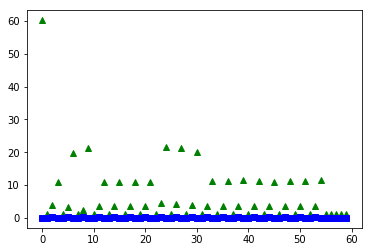

In [22]:
# we want to do a comparison in training speed



x_axis = []
y_axis1 = []
y_axis2 = []
curr_num = 0
for i in range(len(union_)):
    if -1 in union_[i]:
        continue
    else:
        x_axis.append(curr_num)
        y_axis1.append(union_[i][1])
        y_axis2.append(union_[i][3])
        curr_num += 1
        
plt.plot(x_axis, y_axis1, 'g^', x_axis, y_axis2, 'bs')
plt.show()



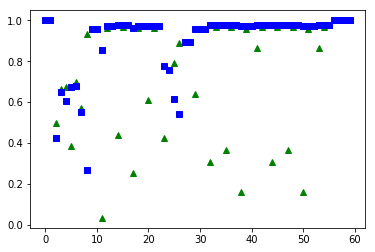

In [23]:
# we want to do a comparison in evaluation accuracy


x_axis = []
y_axis1 = []
y_axis2 = []
curr_num = 0
for i in range(len(union_)):
    if -1 in union_[i]:
        continue
    else:
        x_axis.append(curr_num)
        y_axis1.append(union_[i][0])
        y_axis2.append(union_[i][2])
        curr_num += 1
        
plt.plot(x_axis, y_axis1, 'g^', x_axis, y_axis2, 'bs')
plt.show()

In [24]:
#Comparison for only non random rows



union_1 = np.zeros(shape = (len(row_names),4 ))

print(len(row_names))
print(len(row_names_rep))

index = 0
new_row_names = []
for idx,row_name in enumerate(row_names):
    if ("t=" in row_name) or ("s=" in row_name):
        union_1[index,0] = stats_arr[idx][0]
        union_1[index,1] = stats_arr[idx][1]
        new_row_names.append(row_name)
        if row_name not in row_names_rep:
            union_1[index, 2] = -1
            union_1[index, 3] = -1
        else:
            corresponding_idx = row_names_rep.index(row_name)
            union_1[index,2] = stats_arr_rep[corresponding_idx][0]
            union_1[index,3] = stats_arr_rep[corresponding_idx][1]
        index += 1
    
print(union_1)
print(union_1.shape)



61
60
[[ 9.75539568e-01  1.69000000e+00 -1.00000000e+00 -1.00000000e+00]
 [ 1.00000000e+00  6.01900000e+01  1.00000000e+00  5.00000000e-02]
 [ 1.00000000e+00  1.28000000e+00  1.00000000e+00  9.00000000e-02]
 [ 4.95443645e-01  3.99000000e+00  4.23501199e-01  2.70000000e-01]
 [ 6.66187050e-01  1.08200000e+01  6.49400480e-01  1.20000000e-01]
 [ 6.71942446e-01  1.27000000e+00  6.07194245e-01  9.00000000e-02]
 [ 3.86570743e-01  3.37000000e+00  6.73860911e-01  1.80000000e-01]
 [ 6.97841727e-01  1.99200000e+01  6.77218225e-01  1.10000000e-01]
 [ 5.71223022e-01  1.26000000e+00  5.52997602e-01  9.00000000e-02]
 [ 9.31414868e-01  2.38000000e+00  2.66187050e-01  1.60000000e-01]
 [ 9.59232614e-01  2.13600000e+01  9.59232614e-01  1.10000000e-01]
 [ 9.59232614e-01  1.26000000e+00  9.59232614e-01  9.00000000e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.000

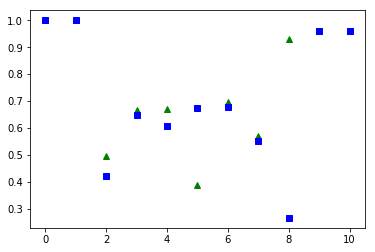

In [25]:
# we want to do a comparison in evaluation accuracy


x_axis = []
y_axis1 = []
y_axis2 = []
curr_num = 0
for i in range(len(union_1)):
    if -1 in union_1[i]:
        continue
    elif 0 in union_1[i]:
        continue
    else:
        x_axis.append(curr_num)
        y_axis1.append(union_1[i][0])
        y_axis2.append(union_1[i][2])
        curr_num += 1
        
plt.plot(x_axis, y_axis1, 'g^', x_axis, y_axis2, 'bs')
plt.show()

In [26]:

union_formatted = union_[1:, :]
avg_speed_original = sum(union_formatted[:, 1]) / len(union_formatted[:,1])
avg_speed_new = sum(union_formatted[:, 3]) / len(union_formatted[:,3])

print("avg time for original pipeline", round(avg_speed_original,3), "seconds")
print("avg time for new pipeline", round(avg_speed_new,3), "seconds")
print("New pipeline is", round(avg_speed_original / avg_speed_new,3), "times faster")
avg_accuracy_original = sum(union_formatted[:,0]) / len(union_formatted[:,0])
avg_accuracy_new = sum(union_formatted[:,2]) / len(union_formatted[:,2])
print("avg accuracy for original pipeline", round(avg_accuracy_original,3), "%")
print("avg accuracy for new pipeline", round(avg_accuracy_new,3), "%")
print("avg accuracy for new is ", round(avg_accuracy_original - avg_accuracy_new,3),"worse than original (Note if negative, it means it is better!)")

union_formatted2 = union_1[1:12,:]
avg_accuracy_original_ = sum(union_formatted2[:,0]) / len(union_formatted2[:,0])
avg_accuracy_new_ = sum(union_formatted2[:,2]) / len(union_formatted2[:,2])
print("avg accuracy for non random columns of original pipeline", round(avg_accuracy_original_,3), "%")
print("avg accuracy for non random columns of new pipeline", round(avg_accuracy_new_,3), "%")
print("avg accuracy for new is ", round(avg_accuracy_original_ - avg_accuracy_new_,3),"worse than original (Note if negative, it means it is better!)")



avg time for original pipeline 6.753 seconds
avg time for new pipeline 0.115 seconds
New pipeline is 58.895 times faster
avg accuracy for original pipeline 0.792 %
avg accuracy for new pipeline 0.901 %
avg accuracy for new is  -0.109 worse than original (Note if negative, it means it is better!)
avg accuracy for non random columns of original pipeline 0.758 %
avg accuracy for non random columns of new pipeline 0.706 %
avg accuracy for new is  0.052 worse than original (Note if negative, it means it is better!)


In [ ]:
a = [1,2,3,4,5]
print(a[1:3])